# Лабораторна робота №10.Стиснення даних. Жадібна стратегія на прикладі кодування
## Підготував: Саєнко Олексій

## 1. Побудувати дерево кодів Гафмена вручну і візуалізувати дерево.
``` python
from graphviz import Digraph

class Node:
    def __init__(self, freq, symbol=None, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

def visualize_huffman_tree(node, dot=None, counter=[0]):
    if dot is None:
        dot = Digraph(comment='Huffman Tree')
        counter[0] = 0
    current_id = str(counter[0])
    counter[0] += 1
    label = f"{node.symbol}\n{node.freq}" if node.symbol else f"{node.freq}"
    dot.node(current_id, label)
    if node.left:
        left_id = str(counter[0])
        dot.edge(current_id, left_id, label='0')
        visualize_huffman_tree(node.left, dot, counter)
    if node.right:
        right_id = str(counter[0])
        dot.edge(current_id, right_id, label='1')
        visualize_huffman_tree(node.right, dot, counter)
    return dot

# Моє дерево Гаффмана
custom_tree = Node(120,
    None,
    Node(50, 'X'),
    Node(70,
        None,
        Node(30,
            None,
            Node(10, 'Y'),
            Node(20, 'Z')),
        Node(40,
            None,
            Node(18, 'W'),
            Node(22, 'V'))))

dot = visualize_huffman_tree(custom_tree)
dot.render('custom_huffman_tree', format='png', view=True)
```
| Символ | Частота | Код Гаффмана |
| ------ | ------- | ------------ |
| X      | 50      | 0            |
| Y      | 10      | 10 0 0       |
| Z      | 20      | 10 0 1       |
| W      | 18      | 10 1 0       |
| V      | 22      | 10 1 1       |


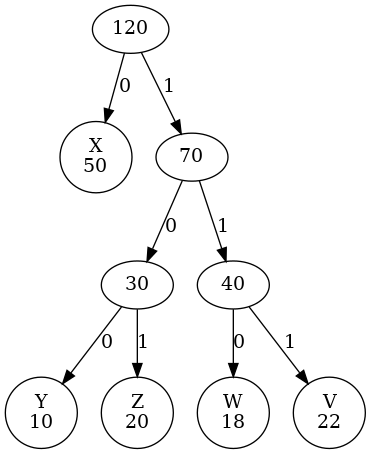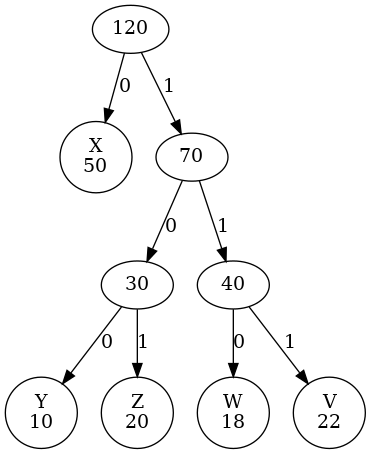

## 2.Код на Python для побудови дерева Гафмена, кодування та декодування повідомлення
``` python
import heapq
from collections import Counter

class Node:
    def __init__(self, freq, symbol=None, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freqs):
    heap = [Node(freq, sym) for sym, freq in freqs.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(left.freq + right.freq, left=left, right=right)
        heapq.heappush(heap, merged)
    return heap[0]

def build_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = dict()
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        build_codes(node.left, prefix + "0", codebook)
        build_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(message, codebook):
    return ''.join(codebook[ch] for ch in message)

def huffman_decode(encoded, tree):
    decoded = []
    node = tree
    for bit in encoded:
        node = node.left if bit == '0' else node.right
        if node.symbol is not None:
            decoded.append(node.symbol)
            node = tree
    return ''.join(decoded)

def get_freqs(message):
    return dict(Counter(message))

# Приклад використання
if __name__ == "__main__":
    message = "ABBCCCDDDDEEEEEFFFFFF"
    freqs = get_freqs(message)
    tree = build_huffman_tree(freqs)
    codes = build_codes(tree)
    encoded = huffman_encode(message, codes)
    decoded = huffman_decode(encoded, tree)

    print("Символи і частоти:", freqs)
    print("Коди Гафмена:", codes)
    print("Закодоване повідомлення:", encoded)
    print("Розкодоване повідомлення:", decoded)
```

Символи і частоти: {'S': 1, 'I': 1, 'M': 2, 'P': 2, 'L': 2, 'E': 3, 'H': 1, 'U': 1, 'F': 2, 'A': 2, 'N': 1, 'X': 1}
Коди Гафмена: {'E': '00', 'P': '010', 'A': '011', 'F': '100', 'L': '101', 'M': '110', 'S': '11100', 'I': '11101', 'H': '11110', 'U': '11111', 'N': '1000', 'X': '1001'}
Закодоване повідомлення: 11100111011100010110001011001001001111001111100110011001000100
Розкодоване повідомлення: SIMPLEHUFFMANEXAMPLE

## 3.Процедура для отримання списку символів та частот з повідомлення
``` python
from collections import Counter

def get_chars_and_freqs(message):
    """
    Повертає два списки:
    - chars: унікальні символи повідомлення
    - freqs: відповідні частоти кожного символу
    """
    counter = Counter(message)
    chars = list(counter.keys())
    freqs = list(counter.values())
    return chars, freqs

# Приклад використання
message = "ABBCCCDDDDEEEEEFFFFFF"
chars, freqs = get_chars_and_freqs(message)
print("Символи:", chars)
print("Частоти:", freqs)
```
Символи: ['A', 'B', 'C', 'D', 'E', 'F']
Частоти: [1, 2, 3, 4, 5, 6]

## 4. Контрольні питання:
- Що таке жадібні алгоритми? Алгоритми, які на кожному кроці приймають локально оптимальне рішення, сподіваючись, що це призведе до глобально оптимального результату.
- Що таке префіксний код? Який код використовується у коді Гафмена? Префіксний код — це код, в якому жоден код символу не є префіксом коду іншого символу. У Гафмена використовується префіксний бінарний код.
- Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»? Купа є ефективною реалізацією черги з пріоритетами, що дозволяє швидко отримувати елемент з найвищим (або найнижчим) пріоритетом.
- Що таке стиснення даних і для чого воно використовується? Які його основні переваги? Стиснення даних — це процес зменшення обсягу даних для економії пам’яті або часу передачі. Основні переваги — зменшення розміру файлів, швидша передача та зберігання.
- Які кроки необхідно виконати для стиснення даних за допомогою алгоритму Гафмена? Підрахунок частот символів, Побудова дерева Гафмена, Присвоєння кодів символам, Кодування повідомлення, Декодування повідомлення
- Які основні обмеження та недоліки алгоритму Гафмена? Чи можливо покращити його продуктивність? Недоліки: погано справляється з дуже малими чи великими алфавітами, не враховує контекст символів. Покращення можливі через комбінування з іншими методами (аріфметичне кодування).
- Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена? Арифметичне кодування, алгоритми LZ77, LZ78, Deflate.
- Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах? Архіватори (ZIP, RAR), формати зображень (JPEG), аудіо (MP3), відео (MPEG), мережеві протоколи.


